## Kaggle House Prices

In [110]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [127]:
train_pd = pd.read_csv("train.csv", index_col=0)

### Explore temporal correlation of house prices
Visualize average house prices over time

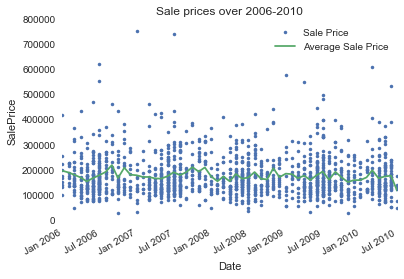

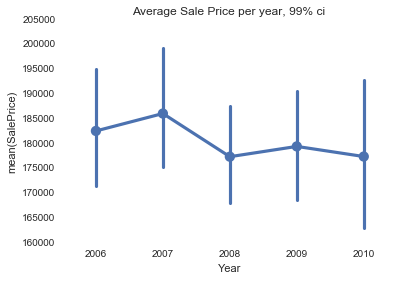

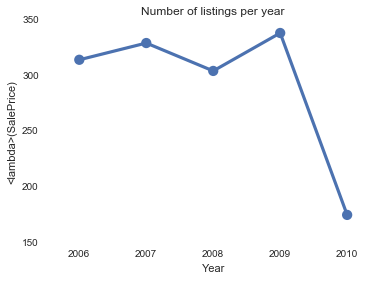

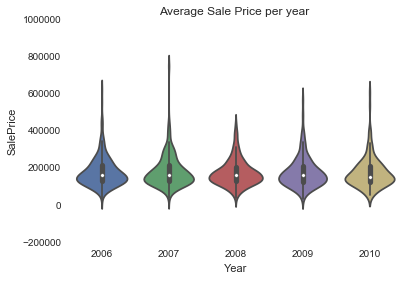

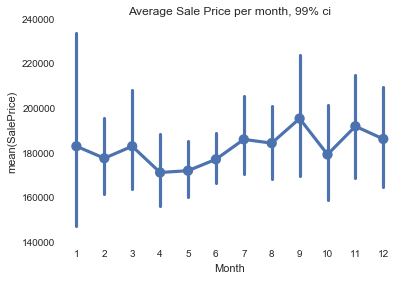

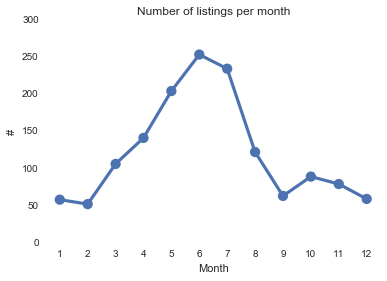

In [179]:
# Add a datetime for simpler plotting
train_pd.rename(columns = {"YrSold":"Year", "MoSold": "Month"}, inplace=True)
day = np.ones(len(train_pd)) # add a fake day - first of each month
train_pd["Day"] = day
date = pd.to_datetime(train_pd[["Year","Month","Day"]], errors="ignore")
train_pd["Date"] = date

# Compute a mean price over time
grouped = train_pd.groupby(["Date"])
mean_sp = grouped["SalePrice"].aggregate(np.mean)



# Plot behaviour over absolute time and month/year
f = train_pd.plot(x="Date",y="SalePrice", style=".")
f.set_ylabel("SalePrice")
plt.plot(mean_sp)
plt.title("Sale prices over 2006-2010")
plt.legend(["Sale Price","Average Sale Price"])
plt.show()

ax = sns.pointplot(x="Year", y="SalePrice", data=train_pd, order=range(2006, 2011), ci=99, estimator=np.mean)
plt.title("Average Sale Price per year, 99% ci ")
plt.show()

ax1 = sns.pointplot(x="Year", y="SalePrice",data=train_pd, order=range(2006, 2011), ci=99,estimator=lambda x: len(x))
plt.title("Number of listings per year")
ax3.set_ylabel("#")
plt.show()

ax = sns.violinplot(x="Year", y="SalePrice", data=train_pd, order=range(2006, 2011))
plt.title("Average Sale Price per year ")
plt.show()

ax2 = sns.pointplot(x="Month", y="SalePrice",data=train_pd, order=range(1,13), ci=99,estimator=np.mean)
plt.title("Average Sale Price per month, 99% ci")
plt.show()

ax3 = sns.pointplot(x="Month", y="SalePrice",data=train_pd, order=range(1,13), ci=99,estimator=lambda x: len(x))
plt.title("Number of listings per month")
ax3.set_ylabel("#")
plt.show()


### Convert data to np.array for sklearn

In [176]:
# Prepare for sklearn prediction
train_ = np.asarray(train_pd)
train_predictor = train_[:,0:-1]
train_prediction = train_[:,-1]

In [174]:
### Linear Regression
lin_reg =  linear_model.LinearRegression()